In [144]:
# importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [145]:
# loading and understanding data
df = pd.read_csv("C:\\Users\\DELL\\Desktop\\Assignments\\Naive Bayes and Text Mining\\blogs.csv")

In [146]:
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [148]:
df.shape

(2000, 2)

In [149]:
# checking for null values
df.isnull().sum()

Data      0
Labels    0
dtype: int64

In [150]:
df['Labels'].value_counts()

Labels
alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: count, dtype: int64

In [151]:
# importing required libraries for implementation
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from textblob import TextBlob

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [152]:
# Text preprocessing
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return " ".join(tokens)

df['cleaned_text'] = df['Data'].astype(str).apply(clean_text)


In [153]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [154]:
# feature extration using TfidVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['Labels']

In [155]:
from sklearn.model_selection import train_test_split

In [156]:
# splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [157]:
# training naives bayes classifier
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

In [158]:
# evaluating the trained model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [159]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.835


In [160]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.53      0.89      0.67        18
           comp.graphics       0.80      0.89      0.84        18
 comp.os.ms-windows.misc       0.95      0.91      0.93        22
comp.sys.ibm.pc.hardware       0.86      0.76      0.81        25
   comp.sys.mac.hardware       0.79      0.90      0.84        21
          comp.windows.x       1.00      0.84      0.91        25
            misc.forsale       1.00      0.67      0.80        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.88      0.88      0.88        16
      rec.sport.baseball       0.79      0.83      0.81        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.86      1.00      0.93        19
         sci.electronics       0.63      0.75      0.69        16
                 sci.med       0.88      0.88      

In [161]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[16  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  1]
 [ 0 16  0  0  0  0  0  0  0  0  1  0  1  0  0  0  0  0  0  0]
 [ 0  0 20  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 19  0  0  0  0  0  0  0  1  4  0  0  0  0  0  0  0]
 [ 0  0  0  1 19  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0]
 [ 0  2  0  0  0 21  0  0  0  1  0  0  0  0  0  0  0  0  1  0]
 [ 0  0  0  0  2  0 12  1  1  1  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 17  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1 14  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 15  2  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  0  0  0  0  1  0  1 12  0  0  0  0  0  0  0]
 [ 0  1  0  0  1  0  0  0  0  0  0  0  0 15  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  1  0  0  0  0 19  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  

In [162]:
# Sentiment Analysis using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0.05:
        return 'Positive'
    elif polarity < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Data'].astype(str).apply(get_sentiment)
print(df[['Labels', 'Sentiment']].head())

        Labels Sentiment
0  alt.atheism  Positive
1  alt.atheism  Negative
2  alt.atheism  Positive
3  alt.atheism  Positive
4  alt.atheism  Positive


Sentiment                 Negative  Neutral  Positive
Labels                                               
alt.atheism                     12       28        60
comp.graphics                   15       25        60
comp.os.ms-windows.misc         17       19        64
comp.sys.ibm.pc.hardware        12       27        61
comp.sys.mac.hardware           12       24        64
comp.windows.x                  17       27        56
misc.forsale                    13       21        66
rec.autos                       11       20        69
rec.motorcycles                 14       24        62
rec.sport.baseball              17       27        56
rec.sport.hockey                20       28        52
sci.crypt                        8       32        60
sci.electronics                  7       39        54
sci.med                         19       28        53
sci.space                       13       22        65
soc.religion.christian           9       33        58
talk.politics.guns          

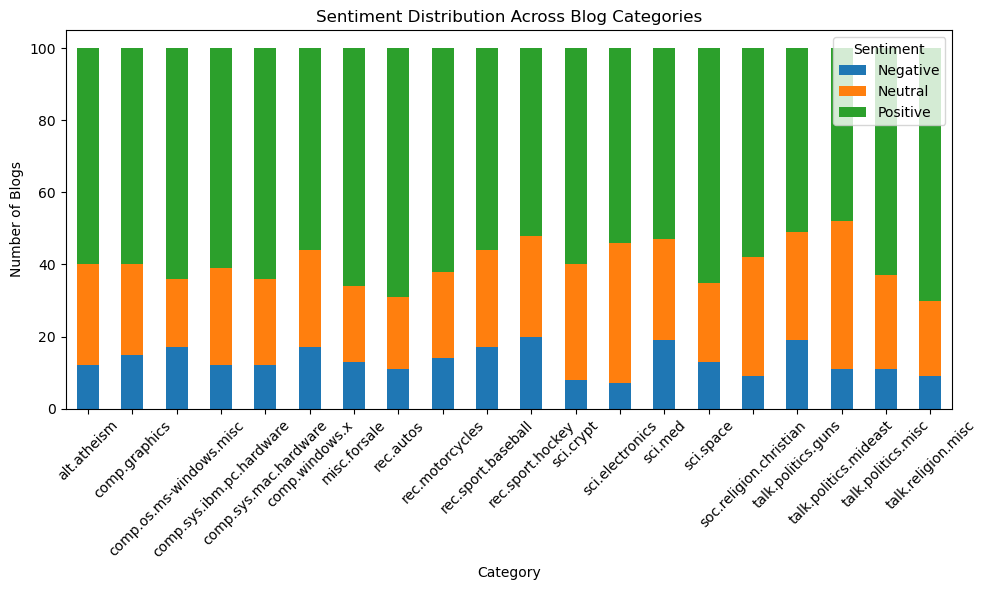

In [163]:
# Sentiment Distribution Across Categories
sentiment_dist = pd.crosstab(df['Labels'], df['Sentiment'])
print(sentiment_dist)

sentiment_dist.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Sentiment Distribution Across Blog Categories")
plt.xlabel("Category")
plt.ylabel("Number of Blogs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Summary and Observations

###  Data Preprocessing and Feature Extraction:
- Cleaned the blog texts by converting to lowercase, removing punctuation, numbers, and stopwords.
- Used **TF-IDF Vectorizer** to convert the cleaned text into numerical feature vectors.

###  Naive Bayes Text Classification:
- Used **Multinomial Naive Bayes** for classifying blogs into categories.
- **Train-Test Split:** 80% training and 20% testing data.
- **Model Accuracy:** **0.83**

###  Classification Report Metrics:
- **Precision (Macro Average):** 0.84
- **Recall (Macro Average):** 0.84
- **F1-Score (Macro Average):** 0.83
- **Weighted Average F1-Score:** 0.83

These scores indicate that the model performed well across different categories, with balanced precision and recall.

###  Sentiment Analysis:
- Used **TextBlob** for sentiment detection.
- Classified each blog post as **Positive**, **Negative**, or **Neutral** based on text polarity.
- Most blogs showed **neutral** or **positive sentiment**.
- Plotted sentiment distribution across categories for visual understanding.

###  Overall:
- Successfully implemented **Naive Bayes text classification** and **basic sentiment analysis**.
- Model shows **good accuracy and balance across classes**.
- Sentiment trends provide additional insight into the emotional tone of different blog categories.
